<a href="https://colab.research.google.com/github/Jhone-fori-freelancer/prediccion-diabetes-ml/blob/main/copia_de_tp_prediccion_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Prediccion Diabetes

In [ ]:
from google.colab import files
uploaded = files.upload()


**✅ 2. Archivo CSV con Pandas**

In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('diabetes.csv')

# Mostrar las primeras filas
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **✅ 3.exploración y preprocesamiento (lo hice localmente)**

*➡️ Analizar valores faltantes:*

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


*➡️ Reemplazar ceros sospechosos:*

In [ ]:
# Columnas donde 0 no tiene sentido
columnas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columnas:
    df[col] = df[col].replace(0, df[col].median())


*➡️ Normalizar con StandardScaler:*

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_scaled = scaler.fit_transform(X)


# ✅ 4. Dividir en train y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# ✅ 5 Datos separados

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
log_model = LogisticRegression(max_iter=200)  # max_iter aumenta iteraciones si es necesario
log_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_log = log_model.predict(X_test)


# ✅ 5.1. Entrenar Regresión Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
log_model = LogisticRegression(max_iter=200)  # max_iter aumenta iteraciones si es necesario
log_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_log = log_model.predict(X_test)


# ✅ 5.2. Entrenar Árbol de Decisión

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)


✅ 5.3. Entrenar Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest - Accuracy: 0.7597402597402597
[[80 19]
 [18 37]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



✅ Importar librerías y preparar

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


✅ Entrenar los tres modelos

In [ ]:
# Regresión Logística
log_model = LogisticRegression(max_iter=200, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


✅ 📊 1. Matriz de Confusión para cada modelo

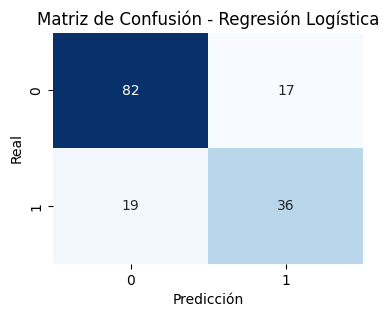

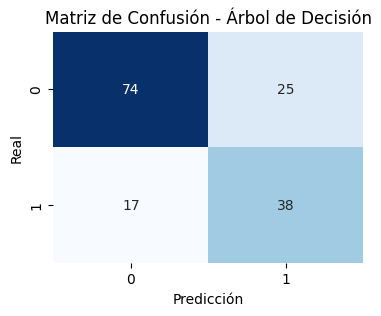

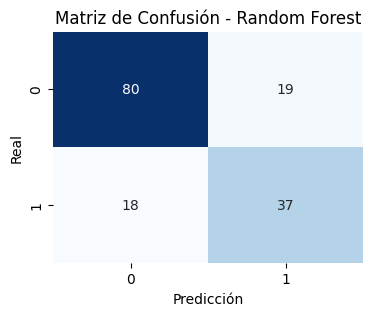

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Función para graficar la matriz
def graficar_matriz(y_true, y_pred, titulo):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión - {titulo}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Graficar para cada modelo
graficar_matriz(y_test, y_pred_log, 'Regresión Logística')
graficar_matriz(y_test, y_pred_tree, 'Árbol de Decisión')
graficar_matriz(y_test, y_pred_rf, 'Random Forest')


✅ 🌟 2. Importancia de características (solo Random Forest)

***Este gráfico muestra qué variables influyen más en la predicción:*

/tmp/ipython-input-22-2671842757.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia.values, y=importancia.index, palette="viridis")


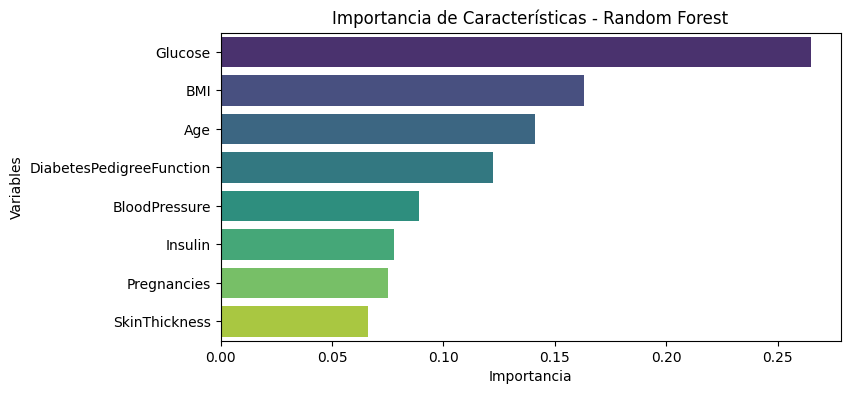

In [ ]:
# Crear dataframe con importancia
import pandas as pd

importancia = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Graficar
plt.figure(figsize=(8, 4))
sns.barplot(x=importancia.values, y=importancia.index, palette="viridis")
plt.title('Importancia de Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()


In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1
